In [39]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing ,neighbors #For Zscore and Minmax
from sklearn.metrics import mean_squared_error #Evaluation parameter 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
filename = "cars.csv"


In [3]:
cars = pd.read_csv(filename)

In [4]:
cars.shape

(392, 9)

In [5]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [6]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [7]:
cars.drop(columns="name" , inplace = True)

In [8]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [10]:
cars_std = cars.copy()

In [12]:
mm = preprocessing.MinMaxScaler()

In [13]:
cars_std.iloc[:,:] = mm.fit_transform(cars_std.iloc[:,:])

In [16]:
cars_std.mpg = cars.mpg

In [17]:
cars_std.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,15.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,18.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,16.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,17.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [18]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [19]:
trainx,testx,trainy,testy = train_test_split(cars_std.drop('mpg',1),
                                            cars_std.mpg,
                                            test_size=0.2)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_13160/3120593321.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(cars_std.drop('mpg',1),


In [20]:
(trainx.shape,trainy.shape)

((313, 7), (313,))

In [21]:
(testx.shape,testy.shape)

((79, 7), (79,))

In [22]:
#Perfrom Cross Validation 
cv_mse = []

In [23]:
# Determine the best value for K
lst_k = np.arange(3,12);lst_k

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
for k in lst_k:
    model = neighbors.KNeighborsRegressor(n_neighbors=k).fit(trainx,trainy)
    scores = cross_val_score(model,trainx,trainy,cv =10 , scoring='neg_mean_squared_error')
    cv_mse.append(scores.mean())
    

In [27]:
print(cv_mse)

[-8.952787410394265, -8.906951171874999, -9.14768326612903, -9.093064544130822, -9.39082159315339, -9.599975633190523, -9.813234318996415, -10.01679502016129, -10.364132672953879]


In [28]:
k = lst_k[cv_mse.index(min(cv_mse))]

In [29]:
print(k)

11


Text(0.5, 1.0, 'Neighbour Vs MSe ')

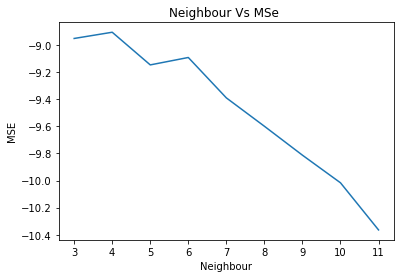

In [32]:
plt.plot(lst_k,cv_mse)
plt.xlabel("Neighbour")
plt.ylabel("MSE")
plt.title("Neighbour Vs MSe ")

In [33]:
#build model 
m1 = neighbors.KNeighborsRegressor(n_neighbors=k).fit(trainx,trainy)

In [34]:
p1= m1.predict(testx)

In [35]:
#Store actual and predicted data in data frame
df = pd.DataFrame({'actual':testy , 'predicted': p1})

In [37]:
df

,actual,predicted
82,28.0,22.454545
263,17.5,17.381818
118,20.0,24.454545
115,16.0,13.000000
137,14.0,13.909091
...,...,...
193,29.0,24.636364
284,17.6,17.936364
291,31.9,31.190909
13,14.0,13.727273


In [38]:
mse = mean_squared_error(df.actual,df.predicted)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Best Fit Line for model 11. RMSE = 3.142')

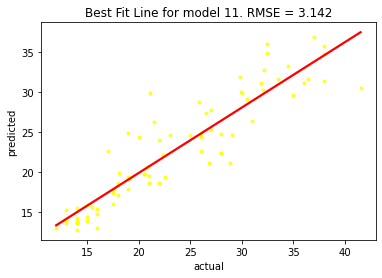

In [45]:
# plot the best fit line of Model 1
sns.regplot(df.actual,df.predicted,marker='.',color='yellow', line_kws={'color':'red'},ci=None)
plt.title("Best Fit Line for model " + str(k) + ". RMSE = " + str(round(np.sqrt(mse),3)))

#Class Excercise <br>
#1)Use standard Scaler to transform build model/predict<br>
#2)use actual data,build model<br>
#Analyze the difference between 3 model<br> 


#4) USing the same dataset build model using<br> 
    1) OLs<br>
    2)DT regressor<br>
    3)RF Regressor<br>